In [44]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,128472.019282,1265.740459,432875.589083
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,124055.861168,1344.200217,436425.378933
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,133518.897062,1384.146517,507108.808651
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,114537.0,1223.0,467700.0,Oakland,136748.636321,1460.170794,558398.920937
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,126646.0,1498.0,538500.0,Oakland,143207.147803,1693.889325,608918.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,54364.200269,829.778170,98140.669876
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,39926.0,622.0,89700.0,Kent,50892.198969,792.840449,114337.280155
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,40895.0,648.0,78800.0,Kent,50494.800900,800.113241,97297.721261


In [3]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,...,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
datapoint,,,,,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,...,339600.0,Oakland,128472.019282,1265.740459,432875.589083,3.289833,92.403116,2.426438,0.000000,96.235885
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,...,347400.0,Oakland,124055.861168,1344.200217,436425.378933,3.779458,91.991502,2.732078,0.000000,95.028409
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,...,410700.0,Oakland,133518.897062,1384.146517,507108.808651,2.864952,92.068915,1.986432,4.474002,88.270859
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,...,467700.0,Oakland,136748.636321,1460.170794,558398.920937,2.783644,91.490689,1.886159,10.065646,79.431072
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,...,538500.0,Oakland,143207.147803,1693.889325,608918.158424,3.233539,89.350002,1.701368,11.388611,78.921079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,...,82200.0,Kent,54364.200269,829.778170,98140.669876,10.772619,71.863339,2.945495,14.002404,63.251202
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,...,89700.0,Kent,50892.198969,792.840449,114337.280155,10.310065,76.716962,6.284198,18.110973,66.957606
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,...,78800.0,Kent,50494.800900,800.113241,97297.721261,10.028445,73.033671,4.326255,16.446499,52.889696


In [40]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")

oakland_data["Zipcode"].unique()

array([48009, 48017, 48025, 48030, 48033, 48034, 48067, 48069, 48070,
       48071, 48072, 48073, 48075, 48076, 48083, 48084, 48085, 48098,
       48165, 48167, 48178, 48220, 48237, 48301, 48302, 48304, 48306,
       48307, 48309, 48320, 48322, 48323, 48324, 48326, 48327, 48328,
       48329, 48331, 48334, 48335, 48336, 48340, 48341, 48342, 48346,
       48348, 48350, 48356, 48357, 48359, 48360, 48362, 48363, 48367,
       48371, 48374, 48375, 48377, 48381, 48382, 48383, 48386, 48390,
       48393, 48442, 48462], dtype=object)

In [5]:
# Create summary statistics table with stats for each county (mean / median of each column)

# Income in Each County, by Zipcode **Jonathan**

In [6]:
# Create scatter plot(s) for Income in each county


In [7]:
# Calculate the linear regression and correlation for each county's plot


In [8]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [9]:
# Export final graph


# Home Values in Each County, by Zipcode **Tamica**

In [10]:
# Create scatter plot(s) for Home Values in each county


In [11]:
# Calculate the linear regression and correlation for each county's plot


In [12]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [13]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [14]:
# Create scatter plot(s) for Rent Prices in each county


In [15]:
# Calculate the linear regression and correlation for each county's plot


In [16]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [17]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

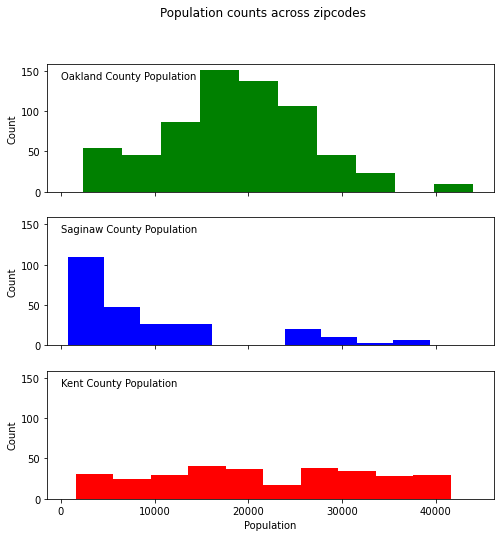

In [18]:
# Create histogram for population distribution across zipcodes
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(311)
ax1.hist(oakland_data["Total Population"],color="green")
ax2 = fig.add_subplot(312,sharex=ax1, sharey=ax1)
ax2.hist(saginaw_data["Total Population"],color="blue")
ax3 = fig.add_subplot(313,sharex=ax1, sharey=ax1)
ax3.hist(kent_data["Total Population"],color="red")
ax1.text(.5,140,"Oakland County Population")
ax2.text(.5,140,"Saginaw County Population")
ax3.text(.5,140,"Kent County Population")
for ax in fig.get_axes():
    ax.set(xlabel="Population",ylabel="Count")
    ax.label_outer()
fig.suptitle("Population counts across zipcodes")
plt.show()

In [70]:
oakland_grouped = oakland_data.groupby("Zipcode").median()
oakland_grouped

,Year,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
Zipcode,,,,,,,,,,,,,,,,,,,,
48009,2015.5,20571.0,18825.5,675.5,10699.0,409.0,818.0,748.5,56.5,110340.0,1145.0,424850.0,135133.766692,1405.636082,521203.983296,3.261686,91.749573,1.988229,7.263456,84.611620
48017,2015.5,11937.5,11164.0,146.5,6765.5,421.5,843.5,750.0,8.0,57773.0,724.5,146050.0,70879.130376,899.294832,179735.503920,1.226149,93.186851,3.518238,1.066080,87.734506
48025,2015.5,14722.5,12637.5,1103.0,7137.0,302.5,408.0,341.0,23.0,114593.0,1166.0,341700.0,142261.529713,1417.316642,430218.591481,7.553965,86.035164,2.055026,3.911486,79.126328
48030,2015.5,16583.0,13512.0,1899.5,7178.0,821.5,4273.5,2942.0,852.0,34640.0,712.0,58300.0,42074.533069,871.948635,69963.545582,11.492167,81.178014,4.950396,19.028161,68.613287
48033,2015.5,16469.0,3921.5,11520.0,7191.0,859.0,2619.0,727.5,1444.0,46168.0,814.5,107750.0,56411.746669,1005.757014,134584.907393,69.926003,23.743406,5.248099,57.482327,28.002639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48386,2015.5,17649.5,16681.5,407.0,8992.5,554.5,955.0,833.0,74.0,75462.0,757.0,188600.0,92231.481315,913.530374,237533.215942,2.312233,94.504826,3.155158,7.859275,84.812246
48390,2015.5,23437.0,21174.0,713.0,12387.0,730.0,1668.0,1536.0,45.0,68827.0,871.5,170750.0,85207.440882,1091.772690,216181.802649,2.980324,90.028202,3.061305,2.742109,91.692642
48393,2015.5,16699.0,13147.5,1984.5,9303.5,605.0,2228.5,1386.0,521.0,48153.5,581.5,178300.0,59831.219316,721.928847,224701.996128,11.842510,78.382538,3.610287,21.652888,60.973986


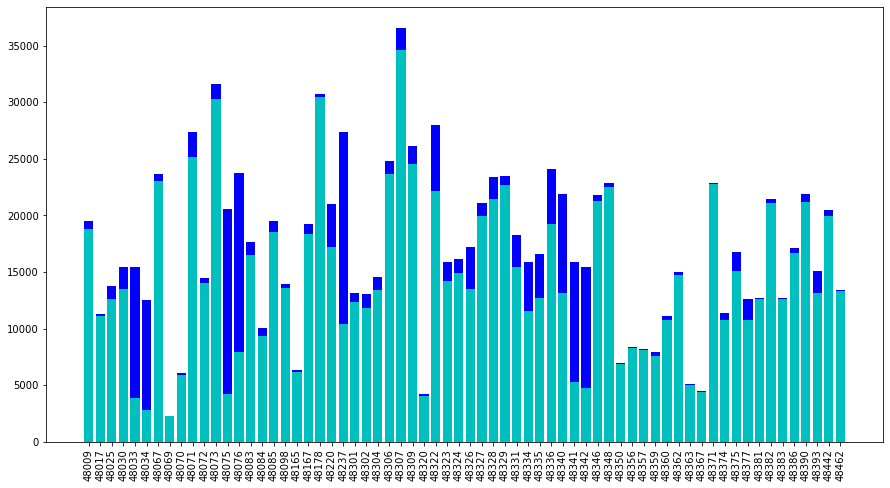

In [77]:
# Stacked bar chart for population by county --Oakland

fig = plt.figure(figsize = (15,8))
xaxis = np.arange(0,len(oakland_grouped.index))
label = (oakland_grouped.index.tolist())
plt.bar(xaxis,oakland_grouped["White Population"],color='c')
plt.xticks(ticks=xaxis,labels=label,rotation=90)
plt.bar(xaxis,oakland_grouped["Black Population"],label=label,bottom=oakland_grouped["White Population"],color='b')


plt.show()

# create groupby zipcode, then zipcode = label and xticks = len(array)

In [ ]:
# Stacked bar chart for population by county --Kent
fig = plt.figure(figsize = (8,8))
plt.bar(kent_data["Zipcode"],kent_data["White Population"],color='c')
plt.bar(kent_data["Zipcode"],kent_data["Black Population"],bottom=kent_data["White Population"],color='b')
plt.show()

In [ ]:
# Stacked bar chart for population by county --Saginaw
fig = plt.figure(figsize = (8,8))
plt.bar(saginaw_data["Zipcode"],saginaw_data["White Population"],color='c')
plt.bar(saginaw_data["Zipcode"],saginaw_data["Black Population"],bottom=saginaw_data["White Population"],color='b')
plt.show()

In [20]:
# Calculate the linear regression and correlation for each county's plot


In [21]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [22]:
# Export final graph


# Combination Visualizations

# GIF Maps

In [23]:
# Relocate needed module and import it (install as well)

In [24]:
# Determine what specific visualizations to convert to map GIFs

In [25]:
# Create maps by county, showing individual points per zipcode (heat map)

In [26]:
# Export maps?